11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                       

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
468/468 [==============================] - 4s 7ms/step - loss: 1.0902 - accuracy: 0.6930 - val_loss: 36.6236 - val_accuracy: 0.9032
Epoch 2/50
468/468 [==============================] - 3s 6ms/step - loss: 0.2869 - accuracy: 0.9145 - val_loss: 33.2749 - val_accuracy: 0.9242
Epoch 3/50
468/468 [==============================] - 3s 6ms/step - loss: 0.2072 - accuracy: 0.9383 - val_loss: 20.9896 - val_accuracy: 0.9505
Epoch 4/50
468/468 [==============================] - 3s 6ms/step - loss: 0.1657 - accuracy: 0.9510 - val_loss: 16.9640 - val_accuracy: 0.9588
Epoch 5/50
468/468 [==============================] - 3s 6ms/step - loss: 0.1389 - accuracy: 0.9587 - val_loss: 15.3256 - val_accuracy: 0.9624
Epoch 6/50
468/468 [==============================] - 3s 6ms/step - loss: 0.1210 - accuracy: 0.9641 - val_loss: 12.1698 - val_accuracy: 0.9698
Epoch 7/50
468/468 [==============================] - 3s 6ms/step - loss: 0.1065 - accuracy: 0.9683 - val_loss: 11.3176 - val_accuracy: 0.9734

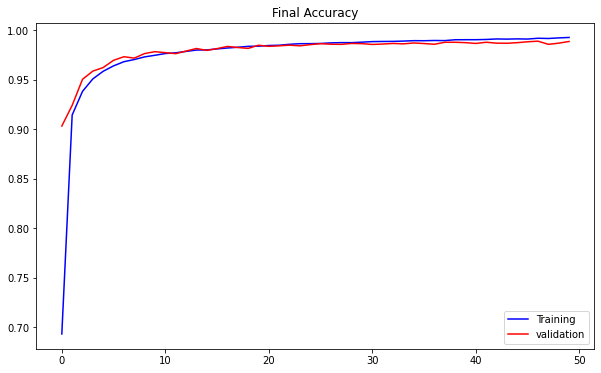

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 21ms/step


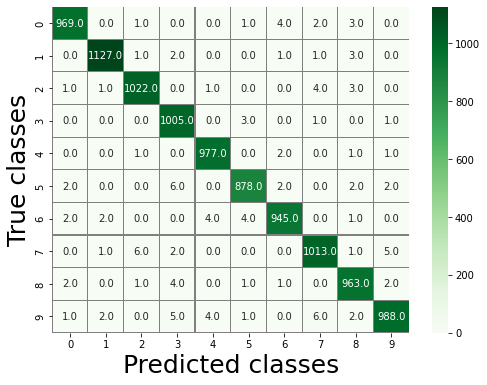

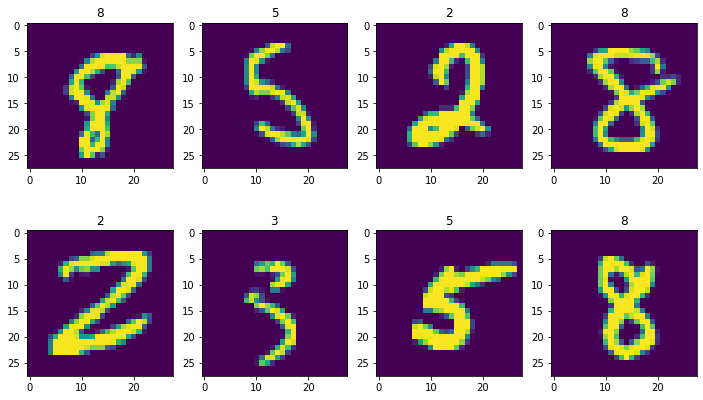

In [2]:
#LeNet5 with MNIST Dataset
import numpy as n
import torch,time,platform
from keras.datasets import mnist
(tx, ty), (tsx, tsy) = mnist.load_data()
print(tx.shape)


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from keras.metrics import categorical_crossentropy
def ln_5():
  m = Sequential()
  m.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', 
                   activation = 'relu', input_shape = (28,28,1)))
  m.add(MaxPooling2D(pool_size = (2,2)))
  m.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
  m.add(MaxPooling2D(pool_size = (2,2)))
  m.add(Flatten())
  m.add(Dense(120, activation = 'relu'))
  m.add(Dense(10, activation = 'softmax'))
  opt = SGD(lr = 0.01)
  m.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy']) 
                
  return m
lm = ln_5()
lm.summary()

import matplotlib.pyplot as p

from keras.utils import to_categorical
def pd(tx, ty, tsx, tsy):
  tx = tx.reshape(tx.shape[0], tx.shape[1], tx.shape[2], 1)
  tsx = tsx.reshape(tsx.shape[0], tsx.shape[1], tsx.shape[2], 1)
  tx = tx.astype('float32')
  tsx = tsx.astype('float32')
  tx = tx/255.0
  tsxn = tsx/255.0
  ty = to_categorical(ty)
  tsy = to_categorical(tsy)
  
  return tx, ty, tsx, tsy

def final(h):
  p.figure(figsize = (10,6))
  p.plot(h.history['accuracy'], color = 'blue', label = 'Training')
  p.plot(h.history['val_accuracy'], color = 'red', label = 'validation')
  p.legend()
  p.title('Final Accuracy')
  p.show()

def tmdl(m, tx, ty, tsx, tsy, ep = 50, bs = 128):
  tx,ty, tsx, tsy = pd(tx, ty, tsx, tsy)
  h = m.fit(tx, ty, epochs = ep, batch_size = bs, 
                      steps_per_epoch = tx.shape[0]//bs, 
                      validation_data = (tsx, tsy), 
                      validation_steps = tsx.shape[0]//bs, verbose = 1)

  _, accuracy = m.evaluate(tsx, tsy, verbose = 1)
  print('%.3f' % (accuracy * 100.0))
  final(h)
tmdl(lm,tx,ty,tsx,tsy)


ystpred = []
for z in range(len(tsx)):
  ig = tsx[z]
  ig = ig.reshape(1,28,28,1)
  img = ig.astype('float32')
  ig = ig/255.0
  vect = lm.predict(ig)
  yp = n.argmax(vect)
  ystpred.append(yp)
  
ystpred = n.asarray(ystpred)

from sklearn.metrics import confusion_matrix
import seaborn as s 
confuma = confusion_matrix(tsy, ystpred)

p.figure(figsize = (8,6))
s.heatmap(confuma, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
p.xlabel('Predicted classes', fontsize = 25)
p.ylabel('True classes', fontsize = 25)
import numpy as np
ip = ['0','1','2','3','4','5','6','7','8','9']
import random
p.figure(figsize = (12,7))
for c in range(8):
  id = random.randint(0,len(tsx))
  ig = tsx[id]
  ig = ig.reshape(1,28,28,1)
  ig = ig.astype('float32')
  ig = ig/255
  ctp = lm.predict(ig)
  c_p = np.argmax(ctp,axis=1)
  p.subplot(240+1+c)
  p.imshow(tsx[id])
  p.title(ip[c_p[0]])



4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 400)               0         
                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
468/468 [==============================] - 2s 4ms/step - loss: 1.0973 - accuracy: 0.6214 - val_loss: 76.4906 - val_accuracy: 0.7159
Epoch 2/50
468/468 [==============================] - 2s 4ms/step - loss: 0.6581 - accuracy: 0.7562 - val_loss: 97.6591 - val_accuracy: 0.7221
Epoch 3/50
468/468 [==============================] - 2s 4ms/step - loss: 0.5844 - accuracy: 0.7824 - val_loss: 67.0500 - val_accuracy: 0.7805
Epoch 4/50
468/468 [==============================] - 2s 4ms/step - loss: 0.5338 - accuracy: 0.8054 - val_loss: 85.0436 - val_accuracy: 0.7614
Epoch 5/50
468/468 [==============================] - 2s 4ms/step - loss: 0.5043 - accuracy: 0.8156 - val_loss: 70.1320 - val_accuracy: 0.7879
Epoch 6/50
468/468 [==============================] - 2s 4ms/step - loss: 0.4804 - accuracy: 0.8256 - val_loss: 66.8020 - val_accuracy: 0.8063
Epoch 7/50
468/468 [==============================] - 2s 4ms/step - loss: 0.4603 - accuracy: 0.8324 - val_loss: 60.6654 - val_accuracy: 0.8186

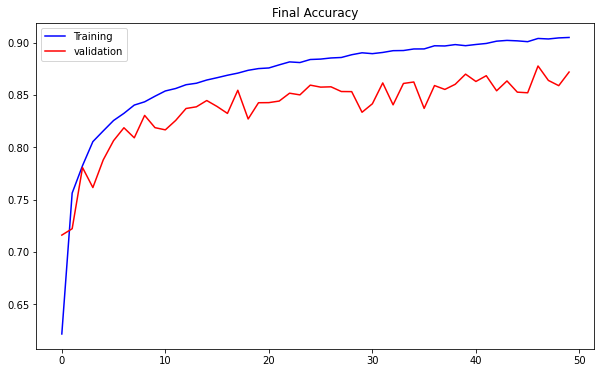

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 19ms/step


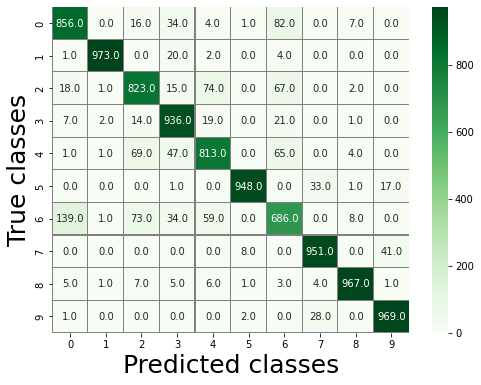

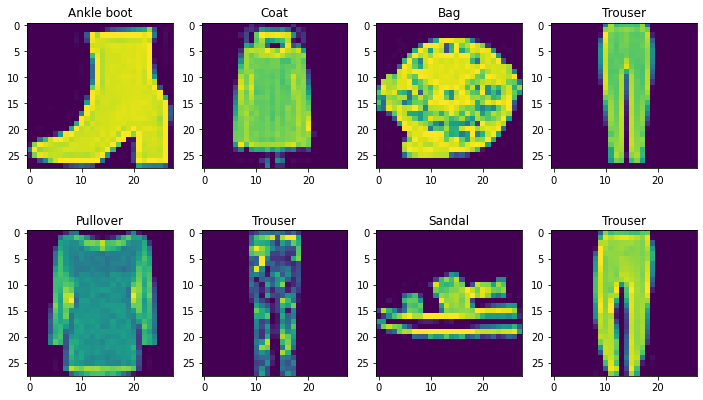

In [16]:
#LeNet5 with FashionMNIST Dataset
import numpy as n
import torch
import time
import platform
#from keras.datasets import mnist
from keras.datasets import fashion_mnist
(tx, ty), (tsx, tsy) = fashion_mnist.load_data()
print(tx.shape)


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from keras.metrics import categorical_crossentropy

def ln_5():
  m = Sequential()
  m.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', 
                   activation = 'relu', input_shape = (28,28,1)))
  m.add(MaxPooling2D(pool_size = (2,2)))
  m.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
  m.add(MaxPooling2D(pool_size = (2,2)))
  m.add(Flatten())
  m.add(Dense(120, activation = 'relu'))
  m.add(Dense(10, activation = 'softmax'))
  opt = SGD(lr = 0.01)
  m.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy']) 
                
  return m
lm = ln_5()
lm.summary()

import matplotlib.pyplot as p

from keras.utils import to_categorical
def pd(tx, ty, tsx, tsy):
  tx = tx.reshape(tx.shape[0], tx.shape[1], tx.shape[2], 1)
  tsx = tsx.reshape(tsx.shape[0], tsx.shape[1], tsx.shape[2], 1)
  tx = tx.astype('float32')
  tsx = tsx.astype('float32')
  tx = tx/255.0
  tsxn = tsx/255.0
  ty = to_categorical(ty)
  tsy = to_categorical(tsy)
  
  return tx, ty, tsx, tsy

def final(h):
  p.figure(figsize = (10,6))
  p.plot(h.history['accuracy'], color = 'blue', label = 'Training')
  p.plot(h.history['val_accuracy'], color = 'red', label = 'validation')
  p.legend()
  p.title('Final Accuracy')
  p.show()

def tmdl(m, tx, ty, tsx, tsy, ep = 50, bs = 128):
  tx,ty, tsx, tsy = pd(tx, ty, tsx, tsy)
  h = m.fit(tx, ty, epochs = ep, batch_size = bs, 
                      steps_per_epoch = tx.shape[0]//bs, 
                      validation_data = (tsx, tsy), 
                      validation_steps = tsx.shape[0]//bs, verbose = 1)

  _, accuracy = m.evaluate(tsx, tsy, verbose = 1)
  print('%.3f' % (accuracy * 100.0))
  final(h)
tmdl(lm,tx,ty,tsx,tsy)


ystpred = []
for z in range(len(tsx)):
  ig = tsx[z]
  ig = ig.reshape(1,28,28,1)
  img = ig.astype('float32')
  ig = ig/255.0
  vect = lm.predict(ig)
  yp = n.argmax(vect)
  ystpred.append(yp)
  
ystpred = n.asarray(ystpred)

from sklearn.metrics import confusion_matrix
import seaborn as s 
confuma = confusion_matrix(tsy, ystpred)

p.figure(figsize = (8,6))
s.heatmap(confuma, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
p.xlabel('Predicted classes', fontsize = 25)
p.ylabel('True classes', fontsize = 25)
import numpy as np
ip = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
import random
p.figure(figsize = (12,7))
for y in range(8):
  id = random.randint(0,len(tsx))
  ig = tsx[id]
  ig = ig.reshape(1,28,28,1)
  ig = ig.astype('float32')
  ig = ig/255
  vecp = lm.predict(ig)
  vec_p = np.argmax(vecp,axis=1)
  p.subplot(240+1+y)
  p.imshow(tsx[id])
  p.title(ip[vec_p[0]])



169001437/169001437 [==============================] - 14s 0us/step
(50000, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                   

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/400
196/196 [==============================] - 10s 9ms/step - loss: 4.6069 - accuracy: 0.0097 - val_loss: 4.6050 - val_accuracy: 0.0094
Epoch 2/400
196/196 [==============================] - 1s 6ms/step - loss: 4.6048 - accuracy: 0.0101 - val_loss: 4.6041 - val_accuracy: 0.0090
Epoch 3/400
196/196 [==============================] - 1s 6ms/step - loss: 4.6040 - accuracy: 0.0104 - val_loss: 4.6032 - val_accuracy: 0.0098
Epoch 4/400
196/196 [==============================] - 1s 6ms/step - loss: 4.6028 - accuracy: 0.0105 - val_loss: 4.6017 - val_accuracy: 0.0107
Epoch 5/400
196/196 [==============================] - 1s 6ms/step - loss: 4.6008 - accuracy: 0.0120 - val_loss: 4.5990 - val_accuracy: 0.0122
Epoch 6/400
196/196 [==============================] - 1s 6ms/step - loss: 4.5969 - accuracy: 0.0139 - val_loss: 4.5933 - val_accuracy: 0.0169
Epoch 7/400
196/196 [==============================] - 1s 6ms/step - loss: 4.5888 - accuracy: 0.0185 - val_loss: 4.5820 - val_accuracy: 0.019

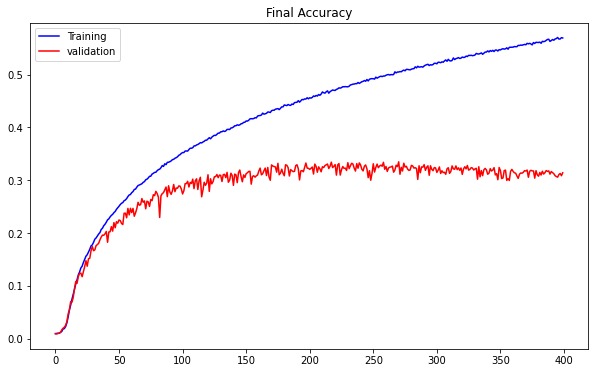

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 22ms/step


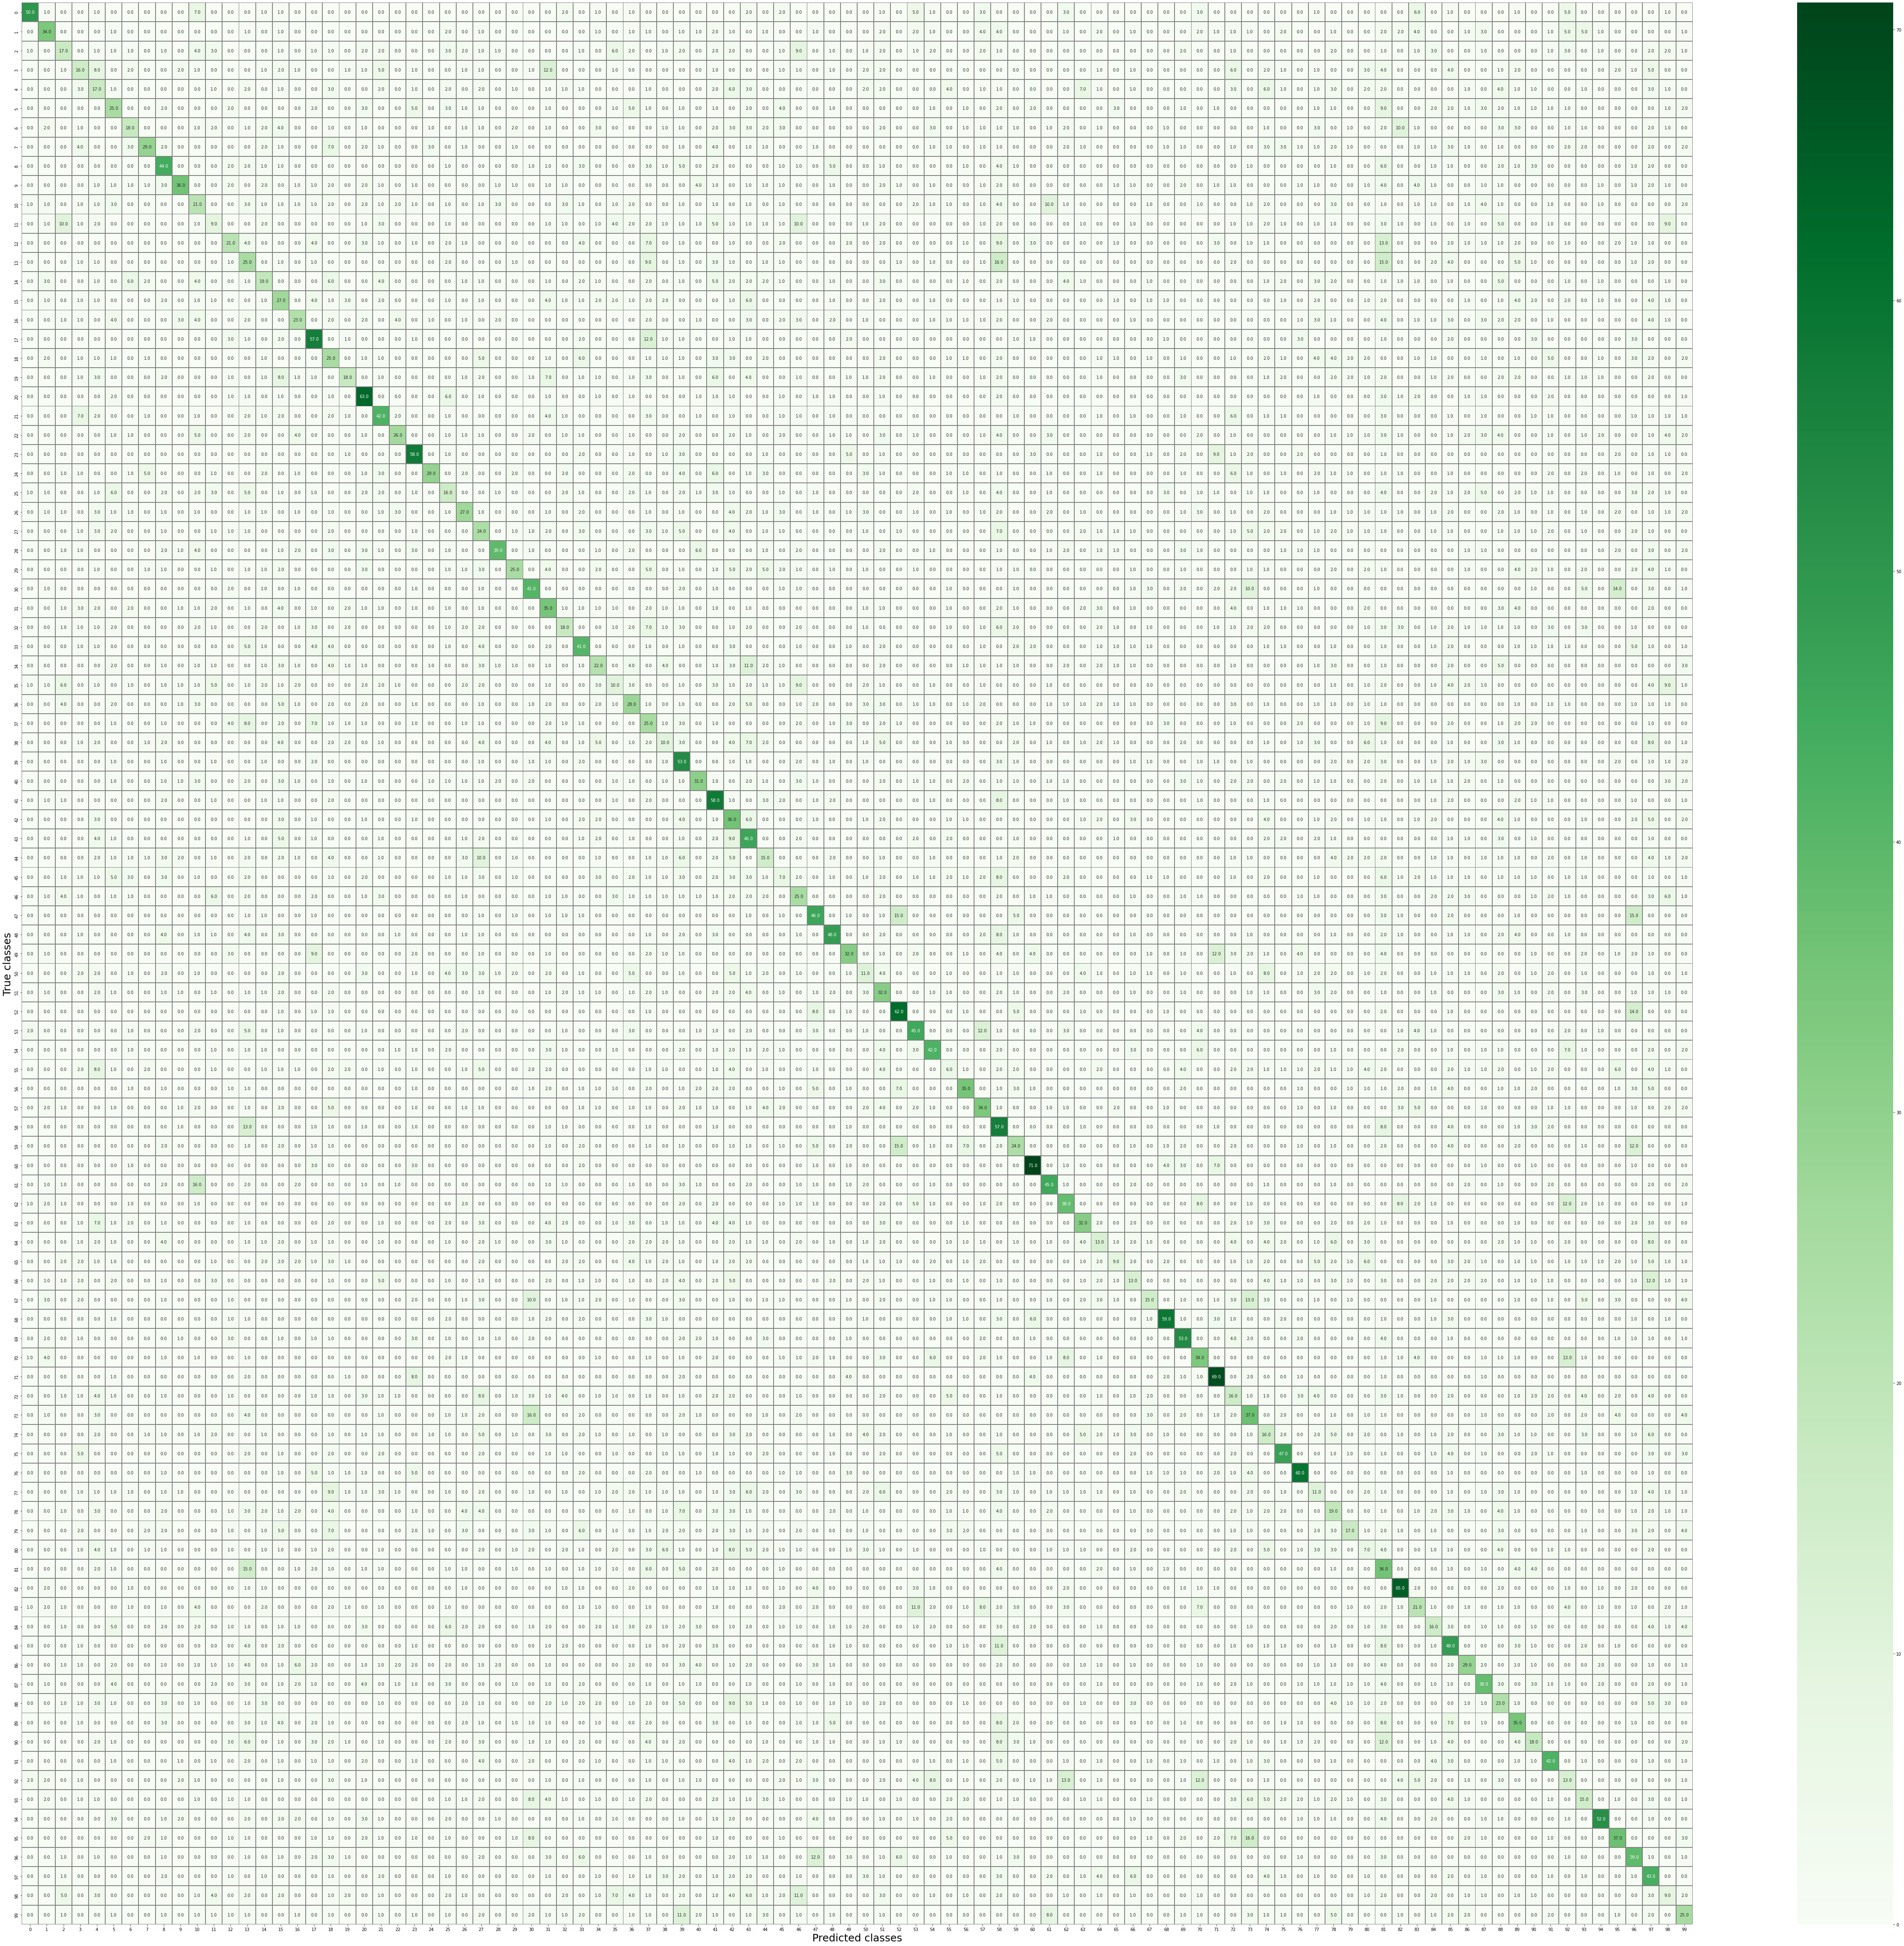

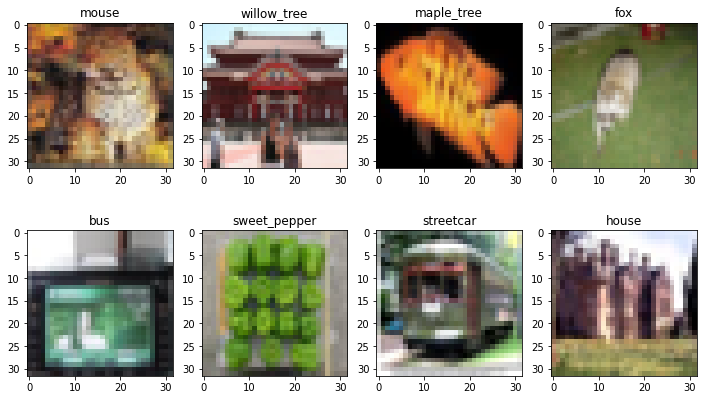

In [1]:
#LeNet5 with CIFAR100 Dataset
import numpy as n
import torch
import time
import platform
#from keras.datasets import mnist
from keras.datasets import cifar100
(tx, ty), (tsx, tsy) = cifar100.load_data()
print(tx.shape)


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from keras.metrics import categorical_crossentropy

def ln_5():
  m = Sequential()
  m.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', 
                   activation = 'relu', input_shape = (32,32,3)))
  m.add(MaxPooling2D(pool_size = (2,2)))
  m.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
  m.add(MaxPooling2D(pool_size = (2,2)))
  m.add(Flatten())
  m.add(Dense(120, activation = 'relu'))
  m.add(Dense(100, activation = 'softmax'))
  opt = SGD(lr = 0.01)
  m.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy']) 
                
  return m
lm = ln_5()
lm.summary()

import matplotlib.pyplot as p

from keras.utils import to_categorical

def final(h):
  p.figure(figsize = (10,6))
  p.plot(h.history['accuracy'], color = 'blue', label = 'Training')
  p.plot(h.history['val_accuracy'], color = 'red', label = 'validation')
  p.legend()
  p.title('Final Accuracy')
  p.show()

def tmdl(m, tx, ty, tsx, tsy, ep = 50, bs = 128):
  h = m.fit(tx/255, to_categorical(ty), epochs = 400, batch_size = 256,validation_data = (tsx/255, to_categorical(tsy)))
  score = m.evaluate(tsx/255, to_categorical(tsy), batch_size=256)

  print("Testset Loss: %f" % score[0])
  print("Testset Accuracy: %f" % score[1])
  final(h)
tmdl(lm,tx,ty,tsx,tsy)


ystpred = []
for z in range(len(tsx)):
  ig = tsx[z]
  ig = ig.reshape(1,32,32,3)
  img = ig.astype('float32')
  ig = ig/255.0
  vect = lm.predict(ig)
  yp = n.argmax(vect)
  ystpred.append(yp)
  
ystpred = n.asarray(ystpred)

from sklearn.metrics import confusion_matrix
import seaborn as s 
confuma = confusion_matrix(tsy, ystpred)

p.figure(figsize = (90,85))
s.heatmap(confuma, linewidths = 0.9, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
p.xlabel('Predicted classes', fontsize = 25)
p.ylabel('True classes', fontsize = 25)
import numpy as np
ip =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm']
import random
p.figure(figsize = (12,7))
for y in range(8):
  id = random.randint(0,len(tsx))
  ig = tsx[id]
  ig = ig.reshape(1,32,32,3)
  ig = ig.astype('float32')
  ig = ig/255
  vecp = lm.predict(ig)
  vec_p = np.argmax(vecp,axis=1)
  p.subplot(240+1+y)
  p.imshow(tsx[id])
  p.title(ip[vec_p[0]])

